In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)

df['job_skills'] = df['job_skills'].apply(clean_list)

c:\Users\noruw\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_US = df[(df['job_country'] == 'United States')].dropna(subset = ['salary_year_avg'])

In [7]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [8]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [21]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False).index

job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

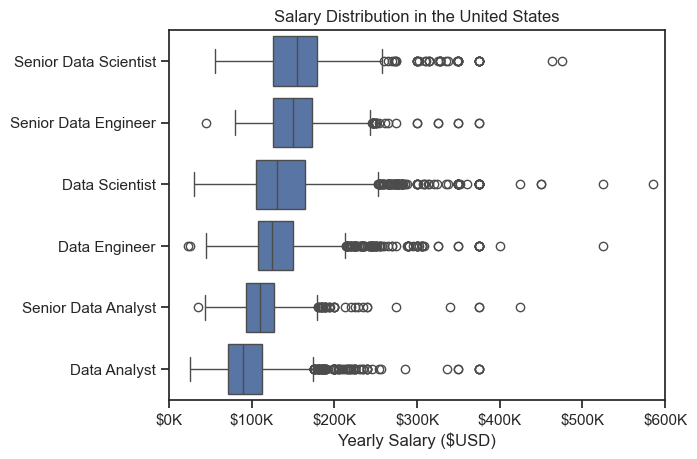

In [23]:
sns.boxplot(data = df_US_top6, x = 'salary_year_avg', y = 'job_title_short', order = job_order)
sns.set_theme(style = 'ticks')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 600000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.show()

In [25]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

In [27]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [35]:
df_DA_US_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'median', ascending = False)

df_DA_US_top_pay = df_DA_US_top_pay.head(10)

df_DA_US_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [43]:
df_DA_US_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False)

df_DA_US_skills = df_DA_US_skills.head(10).sort_values(by = 'median')

df_DA_US_skills

,count,median
job_skills,,
word,461,81194.75
excel,1808,84392.00
powerpoint,462,85000.00
sas,926,90000.00
power bi,838,90000.00
sql,2508,91000.00
r,893,92500.00
sql server,286,92500.00
tableau,1364,92875.00


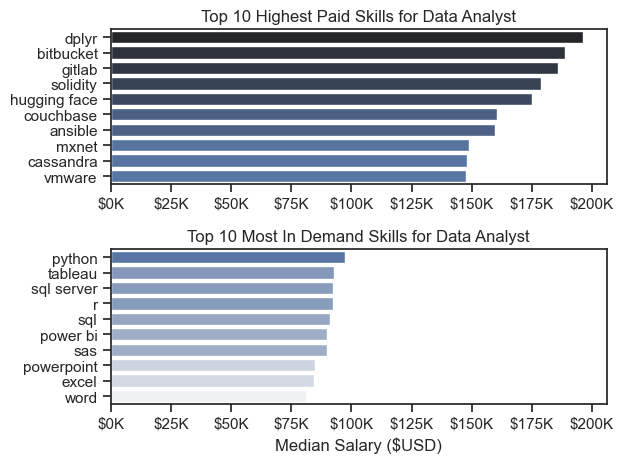

In [45]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style = 'ticks')

sns.barplot(data = df_DA_US_top_pay, x = 'median', y = df_DA_US_top_pay.index, ax = ax[0], hue = 'median', palette = 'dark:b_r', legend = False)
#df_DA_US_top_pay.plot(kind = 'barh', y = 'median', ax=ax[0], legend = False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
#ax[0].invert_yaxis()


sns.barplot(data = df_DA_US_skills, x = 'median', y = df_DA_US_skills.index, ax = ax[1], hue = 'median', palette = 'light:b', legend = False)
#df_DA_US_skills.plot(kind = 'barh', y = 'median', ax=ax[1], legend = False)
ax[1].set_title('Top 10 Most In Demand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].invert_yaxis()

ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()